In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Understanding Data**

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
df.duplicated().sum()

0

**Univariate analysis**

*Categorical*

In [8]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

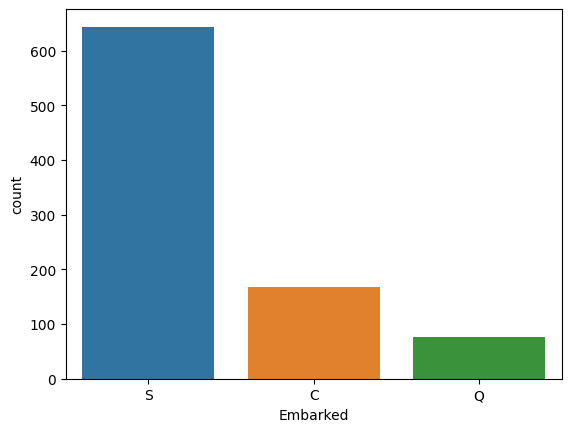

In [9]:
sns.countplot(x='Embarked',data=df) # specifying x axis 

<Axes: xlabel='Survived'>

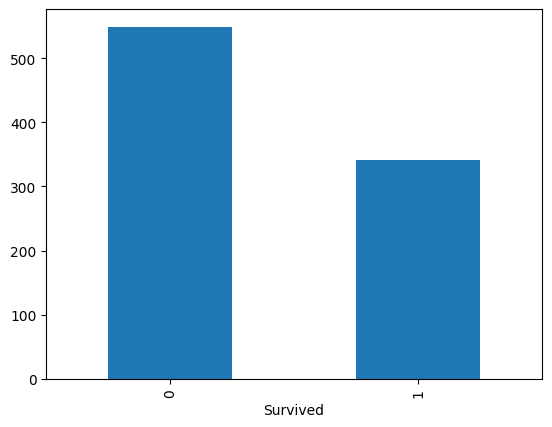

In [10]:
df['Survived'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

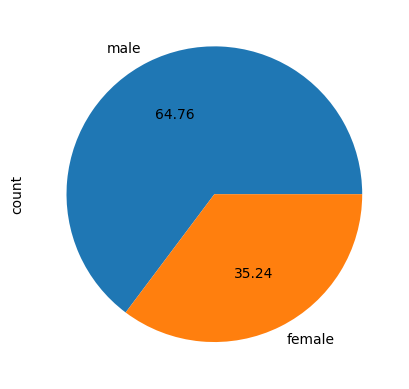

In [11]:
df['Sex'].value_counts().plot( kind ='pie',autopct ='%.2f')

*Numerical Data*

In [12]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 68., 178., 233., 134.,  68.,  26.,   7.]),
 array([ 0.42      , 11.78857143, 23.15714286, 34.52571429, 45.89428571,
        57.26285714, 68.63142857, 80.        ]),
 <BarContainer object of 7 artists>)

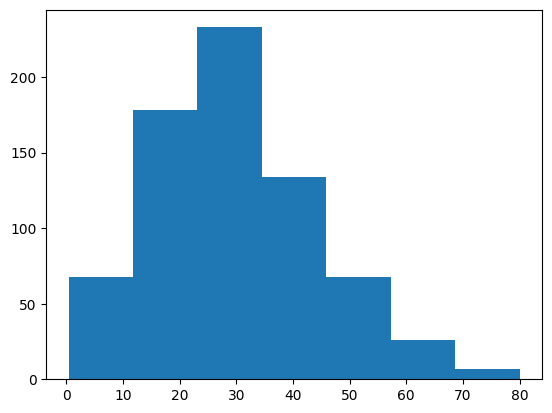

In [13]:
plt.hist(df['Age'], bins = 7)

/tmp/ipykernel_13/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

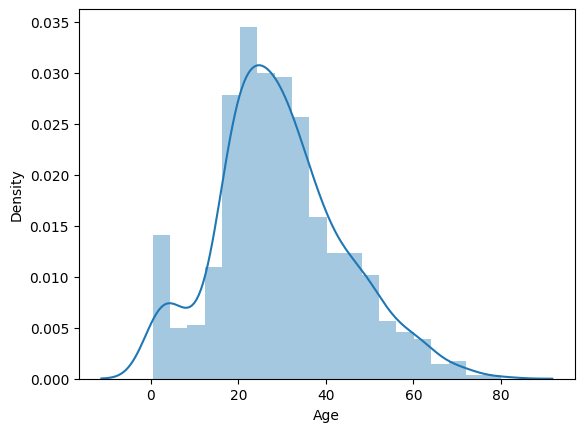

In [14]:
sns.distplot(df['Age'])

<Axes: >

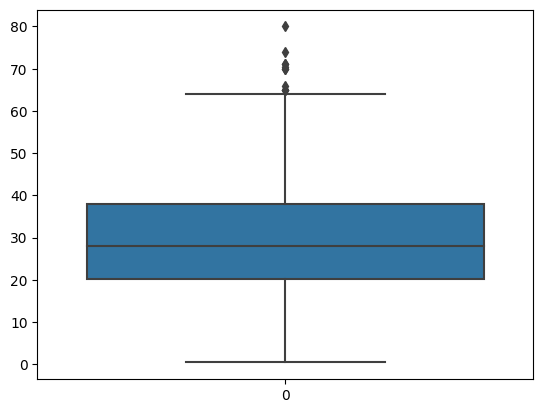

In [15]:
sns.boxplot(df['Age'])

**Bi Variate Analysis**

*num-num*

In [16]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Axes: xlabel='total_bill', ylabel='tip'>

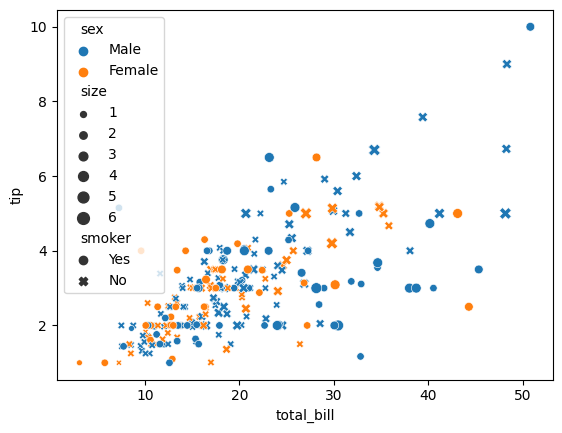

In [17]:
sns.scatterplot(x='total_bill',y='tip',data=df, hue='sex',size='size', style='smoker')

*num-cat*

In [18]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<Axes: xlabel='Pclass', ylabel='Age'>

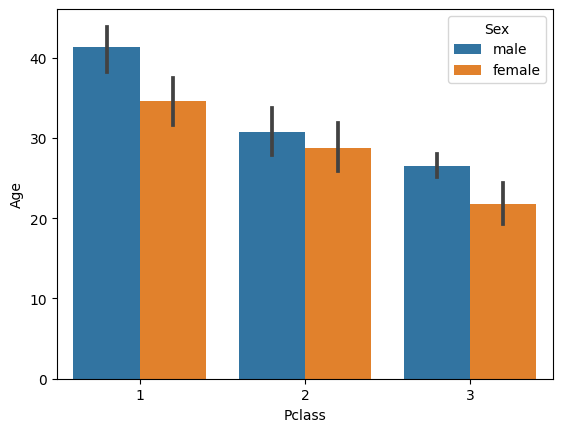

In [19]:
sns.barplot(x='Pclass',y='Age',data=df, hue='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

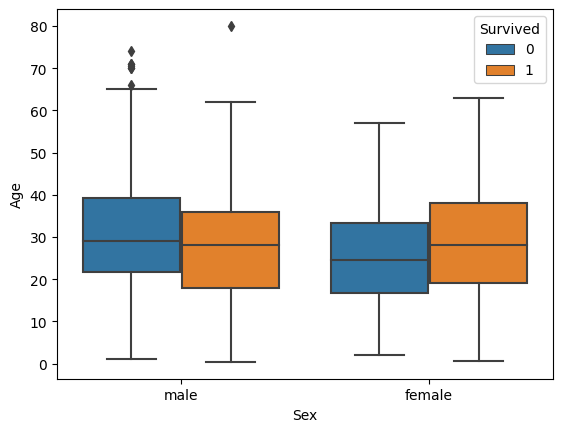

In [20]:
sns.boxplot(x='Sex', y='Age' , data=df , hue='Survived')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


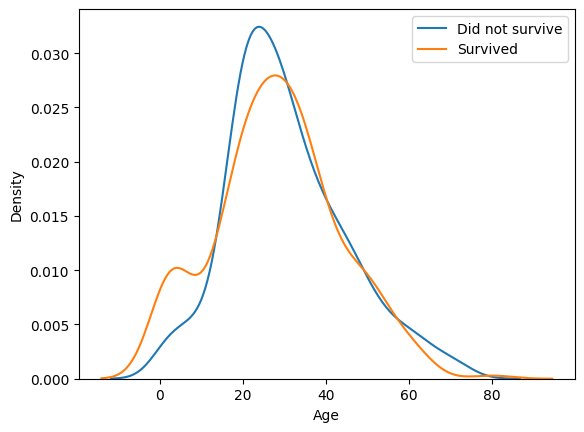

In [21]:
# sns.distplot(df[df['Survived']==0]['Age'],hist=False)
# sns.distplot(df[df['Survived']==1]['Age'],hist=False)
sns.kdeplot(x=df[df['Survived']==0]['Age'], label='Did not survive')
sns.kdeplot(x=df[df['Survived']==1]['Age'], label='Survived')
plt.legend()

*cat-cat*

In [22]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

<Axes: xlabel='Survived', ylabel='Pclass'>

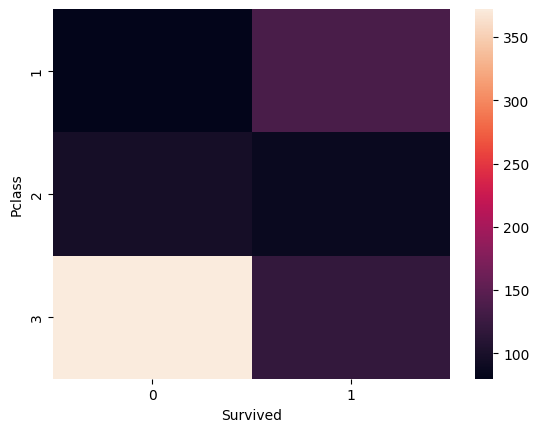

In [23]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

In [24]:
(df.groupby('Embarked')['Survived'].mean() *100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

<Axes: xlabel='Embarked'>

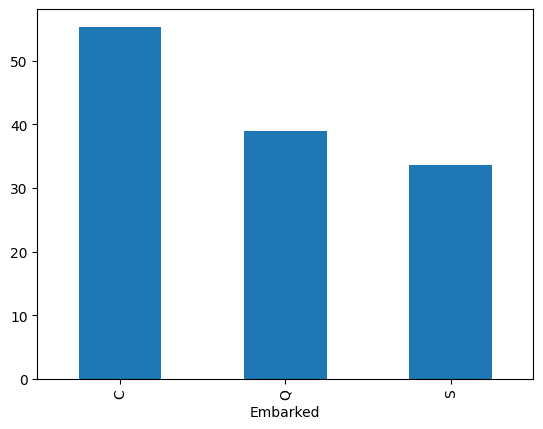

In [25]:
(df.groupby('Embarked')['Survived'].mean() *100).plot(kind='bar')

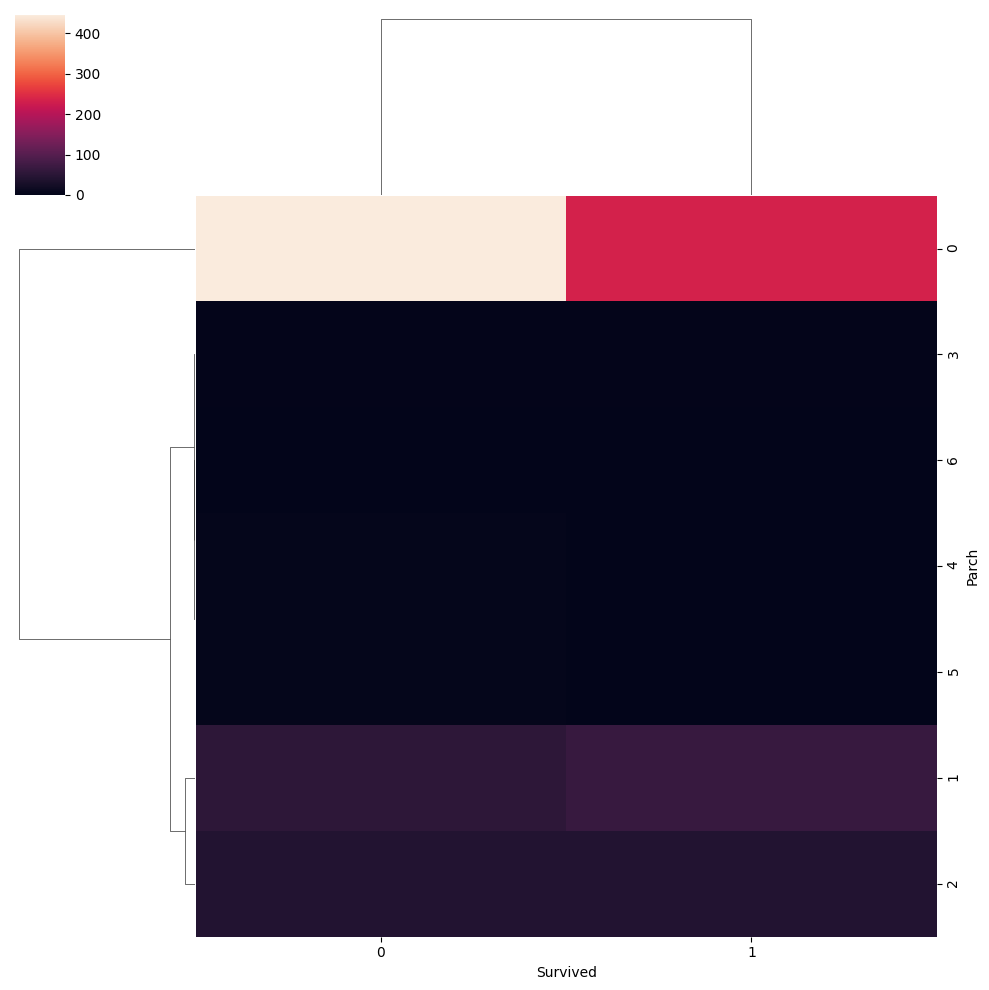

In [26]:
sns.clustermap(pd.crosstab(df['Parch'] , df['Survived']))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

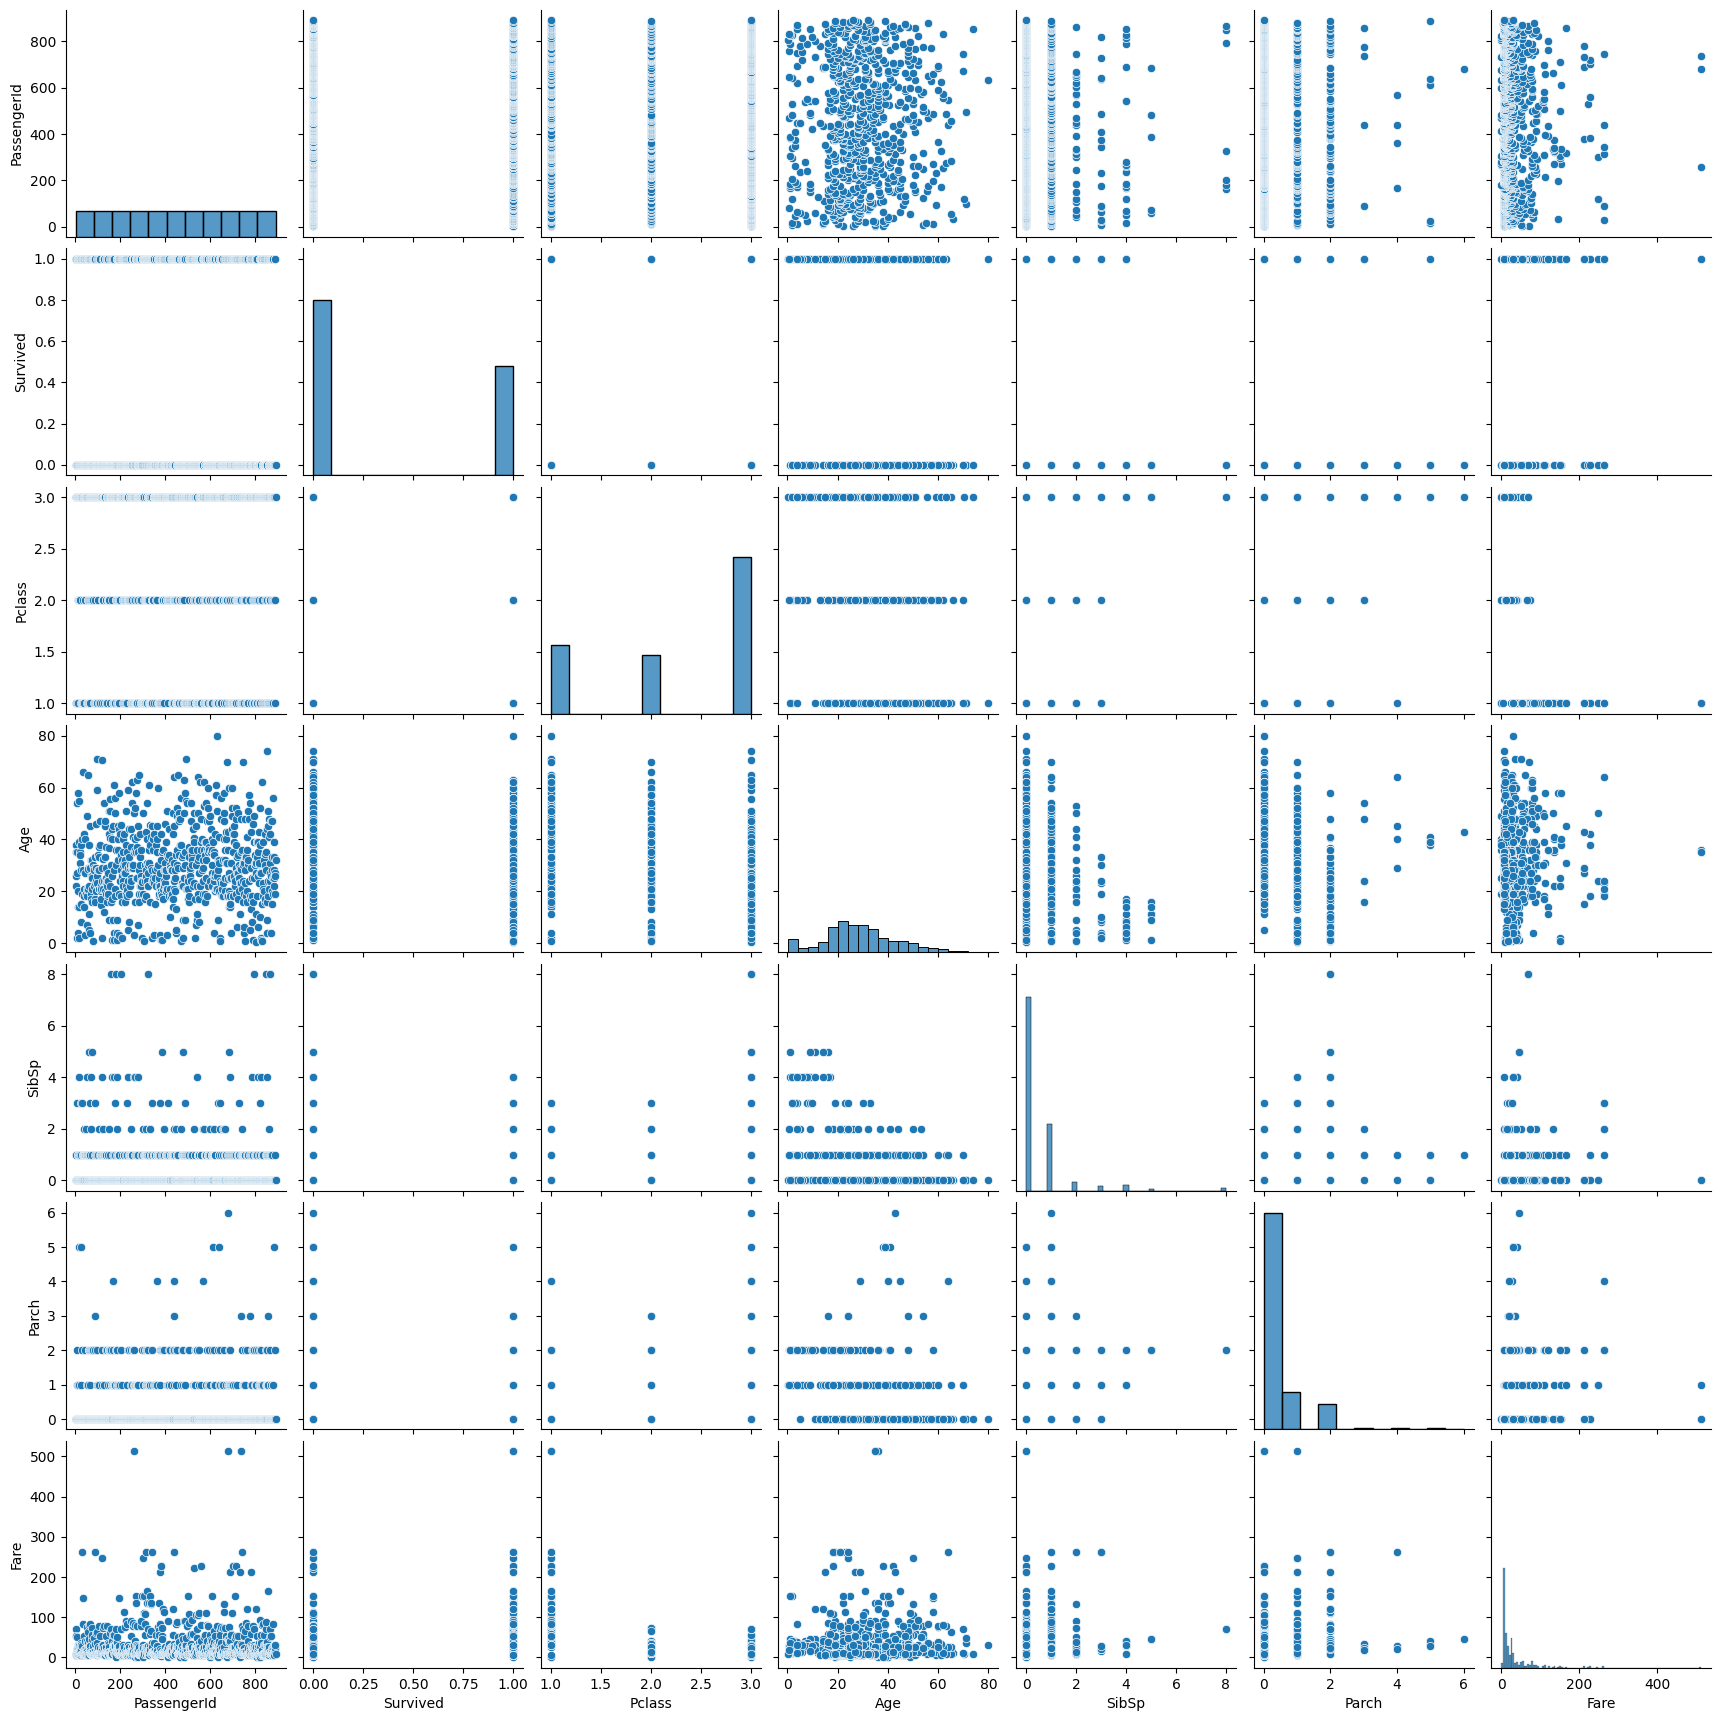

In [27]:
sns.pairplot(df)

*num-num*

In [28]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [29]:
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [30]:
#lineplot -> when x axis is time based 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='passengers'>

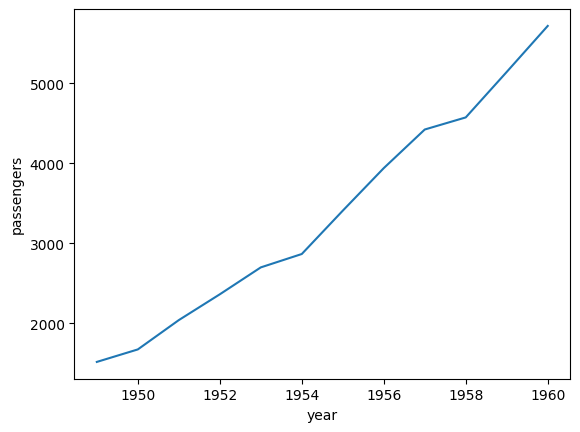

In [31]:
new = flights.groupby('year')['passengers'].sum().reset_index()
sns.lineplot(x = 'year', y = 'passengers' , data= new)

In [32]:
flights.pivot_table(values='passengers' , index='month', columns = 'year')

/tmp/ipykernel_13/2080753415.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers' , index='month', columns = 'year')


year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
Aug    148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
Sep    136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
Oct    119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
Nov    104.0  114.0  146.0  172.0  180.0  203.0  237.0  271.0  305.0  310.0   
Dec    118.0  140.0  166.0  194.0  201.0  229.0  278.0  306.0  336.0  337.0   

year    1959   1960  
month                
Jan    360.0  417.0  
Feb    342.0  391.0  
Mar    406.0  419.0  
Apr    396.0  461.0  
May    420.0  472.0  
Jun    472.0  535.0  
Jul    548.0  622.0  
Aug    559.0  606.0  
Sep    463.0  508.0  
Oct    407.0  461.0  
Nov    362.0  390.0  
Dec    405.0  432.0

/tmp/ipykernel_13/3845273376.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values ='passengers', index='month', columns='year'))


<Axes: xlabel='year', ylabel='month'>

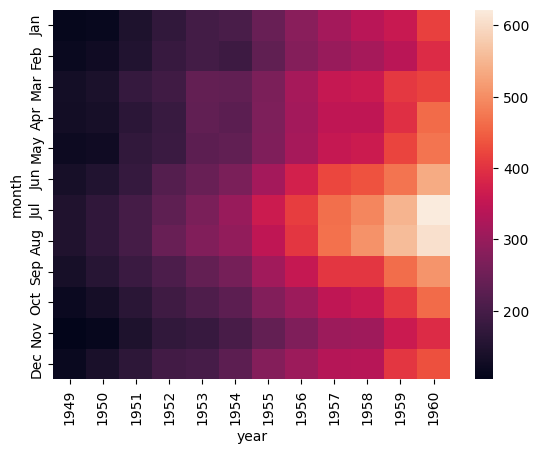

In [33]:
sns.heatmap(flights.pivot_table(values ='passengers', index='month', columns='year'))

**Pandas profiling**

In [34]:
from ydata_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 59.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]